<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [4]:
sac_csv = '/Users/theodoreplotkin/desktop/postmalone/GA_Data_Science/DAT-06-24/class material/Unit 3/data/sacramento_real_estate_transactions.csv'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

In [6]:
data = pd.read_csv(sac_csv)

In [56]:
data.head(800)

,beds,baths,sq__ft,sale_date,price
0,2,1,836,Wed May 21 00:00:00 EDT 2008,59222
1,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212
2,2,1,796,Wed May 21 00:00:00 EDT 2008,68880
3,2,1,852,Wed May 21 00:00:00 EDT 2008,69307
4,2,1,797,Wed May 21 00:00:00 EDT 2008,81900
5,3,1,1122,Wed May 21 00:00:00 EDT 2008,89921
6,3,2,1104,Wed May 21 00:00:00 EDT 2008,90895
7,3,1,1177,Wed May 21 00:00:00 EDT 2008,91002
8,2,2,941,Wed May 21 00:00:00 EDT 2008,94905
9,3,2,1146,Wed May 21 00:00:00 EDT 2008,98937


In [13]:
data["sale_date"].head()

0    Wed May 21 00:00:00 EDT 2008
1    Wed May 21 00:00:00 EDT 2008
2    Wed May 21 00:00:00 EDT 2008
3    Wed May 21 00:00:00 EDT 2008
4    Wed May 21 00:00:00 EDT 2008
Name: sale_date, dtype: object

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [22]:
data.isnull().sum() #check for any NAs

beds         0
baths        0
sq__ft       0
sale_date    0
price        0
dtype: int64

In [49]:
data.dtypes #check the datatypes of each column 

beds          int64
baths         int64
sq__ft        int64
sale_date    object
price         int64
dtype: object

In [14]:
# A:
data.describe()

,beds,baths,sq__ft,price
count,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269
std,1.307932,0.895371,856.123224,139088.818896
min,0.000000,0.000000,-984.000000,-210944.000000
25%,2.000000,1.000000,950.000000,145000.000000
50%,3.000000,2.000000,1304.000000,213750.000000
75%,4.000000,2.000000,1718.000000,300000.000000
max,8.000000,5.000000,5822.000000,884790.000000


In [50]:
data["sale_date"][0]

'Wed May 21 00:00:00 EDT 2008'

In [53]:
data["sale_date"][len(data)]

'Fri May 16 00:00:00 EDT 2008'

In [31]:
data = data[data.sq__ft > 0] #remove the one row with a negative sqft entry

In [34]:
for sqft in data["sq__ft"]:
    if sqft < 0:
        print(True)

In [36]:
for price in data["price"]:
    if price < 0:
        print(True) #it happens that the row with the negative price was also the row with the negative sq__ft

In [18]:
data.corr()

,beds,baths,sq__ft,price
beds,1.000000,0.839650,0.684999,0.344752
baths,0.839650,1.000000,0.665326,0.416718
sq__ft,0.684999,0.665326,1.000000,0.339628
price,0.344752,0.416718,0.339628,1.000000


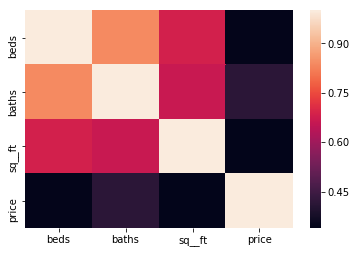

In [17]:
sns.heatmap(data.corr()) #baths is clearly the most highly correlated variable with price at a glance

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a LR model. 

**For each of these variables you believe to be valid potential predictors in an LR model, generate a plot showing the relationship between the independent variable and dependent variable.**

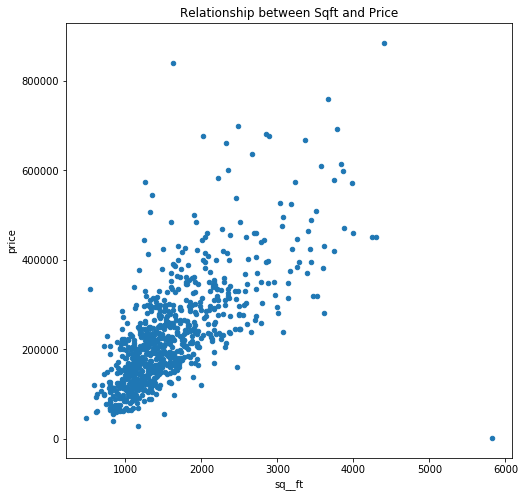

In [44]:
# A
data.plot(x = "sq__ft" , y = "price", kind = "scatter", figsize = (8,8))
plt.title("Relationship between Sqft and Price")
plt.show()

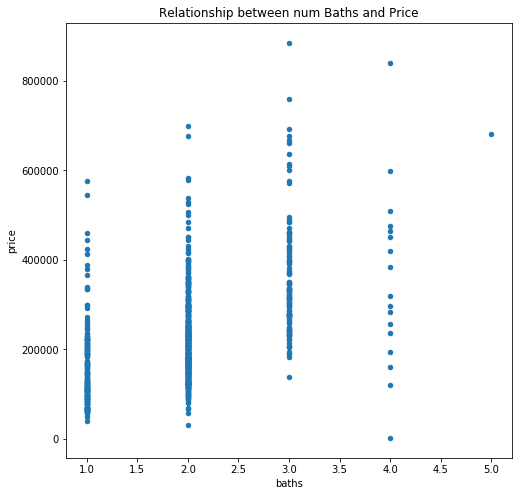

In [58]:
data.plot(x = "baths" , y = "price", kind = "scatter", figsize = (8,8))
plt.title("Relationship between num Baths and Price")
plt.show()

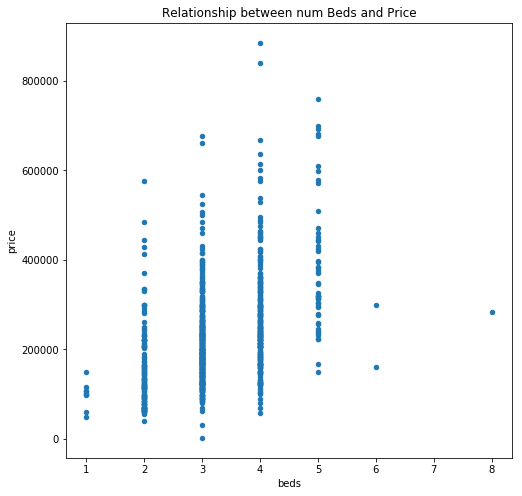

In [59]:
data.plot(x = "beds" , y = "price", kind = "scatter", figsize = (8,8))
plt.title("Relationship between num Beds and Price")
plt.show()

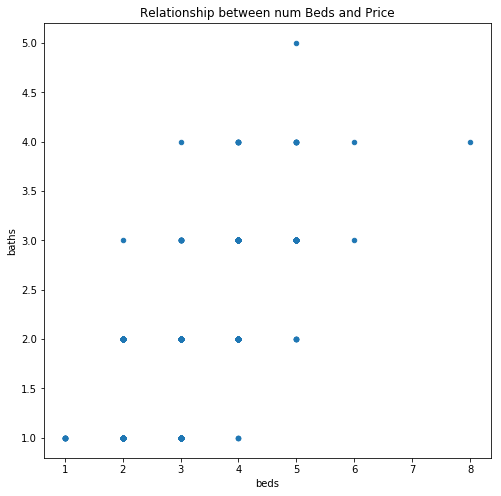

In [60]:
#also note the relationship between beds and baths
data.plot(x = "beds" , y = "baths", kind = "scatter", figsize = (8,8))
plt.title("Relationship between num Beds and Price")
plt.show()

### 4. Which variable would be the best predictor of Y in an LR model? Why?

In [101]:
# A:
X = data[["sq__ft", "baths"]]
y = data.price

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [102]:
# A:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
print(lr.coef_) #marginal values of sq_ft, baths 

[ 125.42595668 -153.06054109]


In [104]:
print(list(zip(lr.coef_, X.columns))) #note use of the zip() method

[(125.42595667558679, 'sq__ft'), (-153.0605410881366, 'baths')]


In [105]:
print(lr.intercept_) #price of land 

30106.714144995174


In [106]:
lr.score(X,y) #r squared is .48 if we regress sq_ft, baths on price

0.4814999086605025

In [108]:
# lets standardize the design matrix and refit the model
X.head()

,sq__ft,baths
0,836,1
1,1167,1
2,796,1
3,852,1
4,797,1


In [112]:
X_standard = (X - X.mean()) / X.std()

y_standard = (y - y.mean())/ y.std()

In [113]:
X_standard.head()

,sq__ft,baths
0,-1.138550,-1.436985
1,-0.639987,-1.436985
2,-1.198799,-1.436985
3,-1.114451,-1.436985
4,-1.197293,-1.436985


In [114]:
X_standard.describe()

,sq__ft,baths
count,8.130000e+02,8.130000e+02
mean,5.339449e-17,2.375611e-16
std,1.000000e+00,1.000000e+00
min,-1.668744e+00,-1.436985e+00
25%,-6.746308e-01,5.696487e-02
50%,-2.604170e-01,5.696487e-02
75%,3.902753e-01,5.696487e-02
max,6.371523e+00,4.538814e+00


In [118]:
lr.fit(X_standard,y_standard)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
lr.score(X_standard,y_standard) #note the R-squared value is the same, i.e. predictive power of the model is same

0.4814999086605025

In [123]:
lr.coef_ #note however importance of the features has completely changed 

array([ 0.69452062, -0.00085451])

In [131]:
lr.intercept_

30106.714144995174

In [132]:
data["prediction_standard"] = lr.predict(X_standard)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [133]:
data["price_standard"] = (data["price"] - data["price"].mean()) / data["price"].std()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
data.drop("prediction_standard", axis = 1,inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [137]:
data.head()

,beds,baths,sq__ft,sale_date,price,prediction,price_standard
0,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,-0.789519,-1.419955
1,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,-0.443257,-1.344974
2,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,-0.831363,-1.339403
3,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,-0.772781,-1.335841
4,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,-0.830317,-1.230810


### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [130]:
# A:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#the total value of all residuals in a regression model should add up to zero

In [138]:
data["predictions_normal"] = lr.predict(X)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
data.head()

,beds,baths,sq__ft,sale_date,price,prediction,price_standard,predictions_normal
0,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,-0.789519,-1.419955,134809.753385
1,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,-0.443257,-1.344974,176325.745044
2,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,-0.831363,-1.339403,129792.715118
3,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,-0.772781,-1.335841,136816.568692
4,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,-0.830317,-1.230810,129918.141074


### Calculate the r-squared value, as well as the rmse, either by hand or through sklearn

In [146]:
SStot = sum((data.price - data.price.mean())**2)

In [149]:
#sum of the squared de-meaned prices

In [148]:
SStot #SStot is total variation from the mean in the price column (in units price squared) 
      #i.e. the error we would get if our model was simply that the predicted price is the avg price

11672848302450.16

In [ ]:
#if we had the residuals columns, we could take the sum of the mean squared deviations from the mean 
    #(recall the mean of the residuals is approx 0)
    
    #this gives us the SSres, sum of the squared residuals (i.e. e_tranpose * e)
    
    #hence 1 - (SSres / SStot) = R_squared 
    
    #so if SSres = SStot, our model is predicting no better than the mean alone would.. 
        #explains none of the variation in price.. 
        #if SSres = 0, our model explains the entirety of the variation in price

In [ ]:
#next we move onto model selection ...